<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/mood_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/mood/

!unzip -qq "/content/drive/MyDrive/mood/competition_data.zip"

/content/drive/MyDrive/mood
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)

In [ ]:
train = pd.DataFrame(train)
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1


In [ ]:
test = pd.DataFrame(test)
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0


In [ ]:
train_question = train.iloc[:,0:26]
test_question = test.iloc[:,0:26]

In [ ]:
train_question.dropna(how = 'all', axis = 0)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0


In [ ]:
null_idx=[]
for i in range(len(train)):
  if train_question.iloc[i][:].isnull().all():
    null_idx.append(i)

In [ ]:
for i in null_idx:
  print(i)
  print(train.loc[i][26:])

207
country         USA
introelapse      11
testelapse      220
surveyelapse    126
TIPI1           3.0
TIPI2           1.0
TIPI3           3.0
TIPI4           5.0
TIPI5           5.0
TIPI6           3.0
TIPI7           5.0
TIPI8           4.0
TIPI9           1.0
TIPI10          1.0
VCL1              1
VCL2              1
VCL3              1
VCL4              1
VCL5              1
VCL6              1
VCL7              0
VCL8              0
VCL9              0
VCL10             1
VCL11             0
VCL12             1
VCL13             0
VCL14             1
VCL15             1
VCL16             1
education       1.0
urban             1
gender          2.0
engnat          1.0
age              14
hand            1.0
religion        2.0
orientation     5.0
voted           2.0
married         1.0
familysize      5.0
ASD             2.0
nerdiness         1
Name: 207, dtype: object
5382
country         USA
introelapse       1
testelapse      272
surveyelapse    301
TIPI1           2.0
TIPI2 

In [ ]:
null_idx

[207, 5382, 7533, 9010, 10446, 13016, 13189, 13676]

In [ ]:
non_question_train = pd.DataFrame(train.iloc[null_idx,26:])
non_question_train.to_csv('non_question_train.csv')

In [ ]:
null_idx=[]
for i in range(len(test)):
  if test_question.iloc[i][:].isnull().all():
    null_idx.append(i)

In [ ]:
null_idx

[730,
 2022,
 4742,
 12565,
 17471,
 19036,
 19116,
 20629,
 22196,
 22823,
 23050,
 23532,
 24316,
 26766,
 27579,
 28970,
 31471,
 33428,
 34544,
 35182]

In [ ]:
for i in null_idx:
  print(i)
  print(test.loc[i][26:])

730
country          USA
introelapse      712
testelapse       237
surveyelapse     192
TIPI1            5.0
TIPI2            5.0
TIPI3            5.0
TIPI4            5.0
TIPI5            5.0
TIPI6            5.0
TIPI7            5.0
TIPI8            5.0
TIPI9            5.0
TIPI10           5.0
VCL1               1
VCL2               0
VCL3               0
VCL4               0
VCL5               0
VCL6               0
VCL7               0
VCL8               0
VCL9               0
VCL10              1
VCL11              0
VCL12              0
VCL13              0
VCL14              0
VCL15              0
VCL16              1
education        3.0
urban              2
gender           3.0
engnat           1.0
age               23
hand             3.0
religion        11.0
orientation      4.0
voted            2.0
married          3.0
familysize       6.0
ASD              2.0
Name: 730, dtype: object
2022
country         AUS
introelapse       9
testelapse      330
surveyelapse    243
TIPI

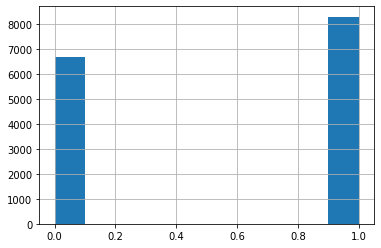

In [ ]:
train['nerdiness'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd563ae8390>,
      dtype=object)

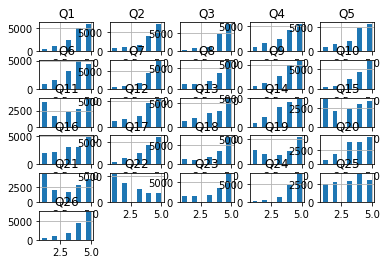

In [ ]:
train.iloc[:,0:26].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5f8f95d0>,
      dtype=object)

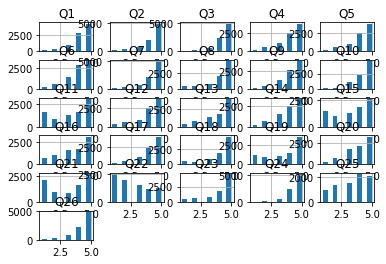

In [ ]:
row_one = []
for i in range(len(train)):
  if train['nerdiness'][i]==1:
    row_one.append(i)

train.iloc[row_one,0:26].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b603b6b50>,
      dtype=object)

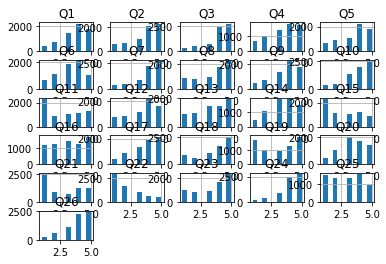

In [ ]:
row_zero = []
for i in range(len(train)):
  if train['nerdiness'][i]==0:
    row_zero.append(i)

train.iloc[row_zero,0:26].hist()

In [ ]:
print(train['introelapse'][0])
print(train['testelapse'][0])
print(train['surveyelapse'][0])

3
553
6


In [ ]:
print(train['introelapse'][1])
print(train['testelapse'][1])
print(train['surveyelapse'][1])

5
85
120


In [ ]:
print(train['introelapse'][2])
print(train['testelapse'][2])
print(train['surveyelapse'][2])

9
108
100


In [ ]:
print(train['introelapse'][3])
print(train['testelapse'][3])
print(train['surveyelapse'][3])

2
121
139


In [ ]:
print(train['introelapse'].max())
print(train['testelapse'].max())
print(train['surveyelapse'].max())

855030
474572
15166994


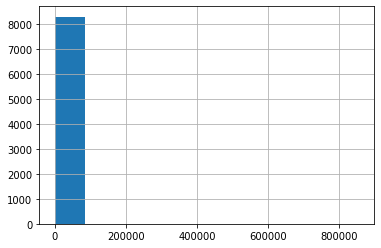

In [ ]:
train.iloc[row_one,27].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5e18b150>,
      dtype=object)

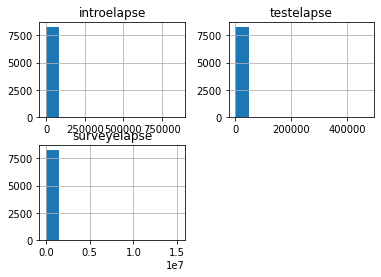

In [ ]:
train.iloc[row_one,27:30].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5e395bd0>,
      dtype=object)

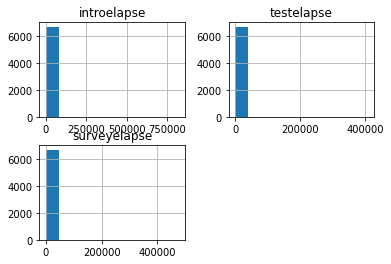

In [ ]:
train.iloc[row_zero,27:30].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5dfa2c10>,
      dtype=object)

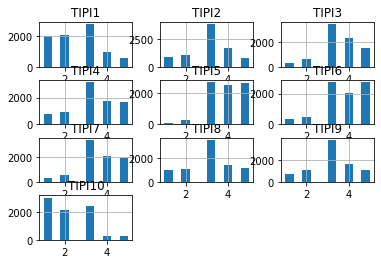

In [ ]:
train.iloc[row_one,30:40].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5db4c410>,
      dtype=object)

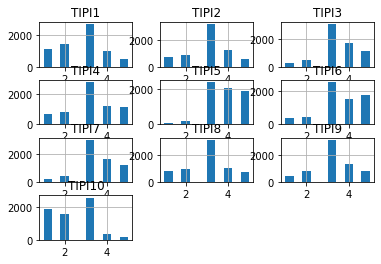

In [ ]:
train.iloc[row_zero,30:40].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5d6c97d0>,
      dtype=object)

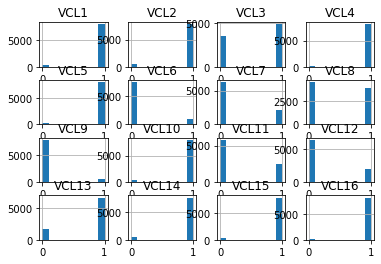

In [ ]:
train.iloc[row_one,40:56].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5d0c7a90>,
      dtype=object)

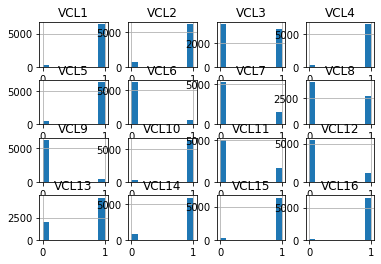

In [ ]:
train.iloc[row_zero,40:56].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5cac4590>,
      dtype=object)

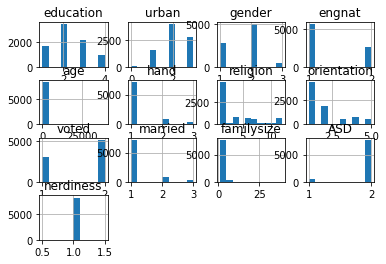

In [ ]:
train.iloc[row_one,56:].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b5ca3de10>,
      dtype=object)

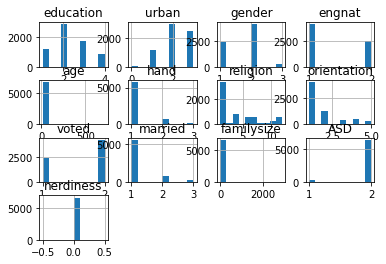

In [ ]:
train.iloc[row_zero,56:].hist()

In [ ]:
train.iloc[row_one,67].value_counts()#ACD

2.0    7653
1.0     607
Name: ASD, dtype: int64

In [ ]:
lenone = len(row_one)

In [ ]:
print(7654/8303*100)
print(608/8303*100)

92.1835481151391
7.322654462242563


In [ ]:
train.iloc[row_zero,67].value_counts()

2.0    6344
1.0     307
Name: ASD, dtype: int64

In [ ]:
lenzero = len(row_zero)

In [ ]:
print(6344/6697*100)
print(307/6697*100)

94.72898312677319
4.584142153202927


In [ ]:
train.iloc[row_one,61].value_counts()#hand

1.0    7066
2.0     854
3.0     363
Name: hand, dtype: int64

In [ ]:
print(7066/lenone*100)
print(854/lenone*100)
print(363/lenone*100)

85.10177044441768
10.285438997952548
4.371913766108635


In [ ]:
train.iloc[row_zero,61].value_counts()

1.0    5728
2.0     696
3.0     246
Name: hand, dtype: int64

In [ ]:
print(5728/lenzero*100)
print(696/lenzero*100)
print(246/lenzero*100)

85.53083470210542
10.392713155144094
3.673286546214723


In [ ]:
train['gender'].unique()

array([ 3.,  2.,  1., nan])

In [ ]:
train['ASD'].unique()

array([ 2.,  1., nan])

In [ ]:
train['engnat'].unique()

array([ 1.,  2., nan])

In [ ]:
engnat_one = []
engnat_two = []
import numpy as np
for i in range(len(train)):
  if train['engnat'][i] == 1:
    engnat_one.append(train['country'][i])
  elif train['engnat'][i] == 2:
    engnat_two.append(train['country'][i])

In [ ]:
set(engnat_one)

{'ARE',
 'ARG',
 'AUS',
 'AUT',
 'BEL',
 'BHR',
 'BHS',
 'BRA',
 'BRB',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CRI',
 'CUW',
 'CZE',
 'DEU',
 'DNK',
 'EGY',
 'ESP',
 'EST',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GBR',
 'GEO',
 'GHA',
 'GRC',
 'GUF',
 'GUM',
 'GUY',
 'HKG',
 'HND',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KHM',
 'KOR',
 'KWT',
 'LBN',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MEX',
 'MNP',
 'MWI',
 'MYS',
 'NAM',
 'NGA',
 'NLD',
 'NOR',
 'NZL',
 'PAK',
 'PER',
 'PHL',
 'POL',
 'PRI',
 'PRT',
 'QAT',
 'RUS',
 'SAU',
 'SGP',
 'SRB',
 'SWE',
 'THA',
 'TTO',
 'TUN',
 'TUR',
 'TWN',
 'UGA',
 'UKR',
 'USA',
 'VEN',
 'VGB',
 'VIR',
 'VNM',
 'ZAF',
 'ZMB',
 nan}

In [ ]:
set(engnat_two)

{'AFG',
 'AGO',
 'ALA',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BEL',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BRA',
 'BRN',
 'BWA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'COL',
 'CRI',
 'CUW',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'GBR',
 'GEO',
 'GHA',
 'GRC',
 'GRL',
 'GTM',
 'HKG',
 'HND',
 'HRV',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLT',
 'MNG',
 'MOZ',
 'MUS',
 'MYS',
 'NAM',
 'NGA',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'PNG',
 'POL',
 'PRI',
 'PRT',
 'PRY',
 'QAT',
 'ROU',
 'RUS',
 'RWA',
 'SAU',
 'SDN',
 'SGP',
 'SLV',
 'SRB',
 'SSD',
 'SVK',
 'SVN',
 'SWE',
 'SYR',
 'THA',
 'TUN',
 'TUR',
 'TWN',
 'UKR',
 'URY',
 'USA',
 'VEN',
 'VNM',
 'ZAF',
 nan}

In [ ]:
import numpy as np
for i in range(len(train)):
  if train['gender'][i] == 3:
    print('gender3')
    print(train['country'][i])


train['country'][train['gender'].isnull()]

gender3
USA
gender3
ARG
gender3
USA
gender3
USA
gender3
GBR
gender3
USA
gender3
FIN
gender3
USA
gender3
USA
gender3
USA
gender3
USA
gender3
GBR
gender3
FIN
gender3
USA
gender3
NOR
gender3
USA
gender3
USA
gender3
USA
gender3
USA
gender3
JPN
gender3
USA
gender3
GBR
gender3
CAN
gender3
CAN
gender3
USA
gender3
USA
gender3
GBR
gender3
USA
gender3
USA
gender3
GBR
gender3
USA
gender3
SWE
gender3
USA
gender3
USA
gender3
USA
gender3
GBR
gender3
USA
gender3
GBR
gender3
USA
gender3
DEU
gender3
ESP
gender3
IND
gender3
USA
gender3
USA
gender3
DNK
gender3
USA
gender3
USA
gender3
USA
gender3
NZL
gender3
USA
gender3
USA
gender3
USA
gender3
USA
gender3
CAN
gender3
USA
gender3
USA
gender3
USA
gender3
DEU
gender3
USA
gender3
USA
gender3
CUW
gender3
USA
gender3
USA
gender3
USA
gender3
USA
gender3
USA
gender3
NOR
gender3
USA
gender3
NOR
gender3
USA
gender3
CAN
gender3
USA
gender3
USA
gender3
CZE
gender3
USA
gender3
SWE
gender3
USA
gender3
ESP
gender3
AUS
gender3
ITA
gender3
USA
gender3
USA
gender3
DEU
gend

index
4160     ARG
4282     USA
4997     USA
5368     FRA
6343     MYS
7733     GRC
8219     USA
8704     USA
8832     IRL
9588     USA
9732     USA
10277    BRA
10412    AUS
10841    EST
11318    EST
11910    USA
14286    USA
14425    HRV
14580    GBR
Name: country, dtype: object

In [ ]:
eng = train.loc[:,['country','religion','engnat']]
eng.to_csv('eng.csv')

In [ ]:
sum1=0
sum2=0
for i in range(len(train[['country']])):
  if train['country'][i] == 'NLD':
    if train['engnat'][i] == 1:
      sum1+=1
    elif train['engnat'][i] == 2:
      sum2+=1

In [ ]:
print(sum1)
print(sum2)

20
154


In [ ]:
engnat1 = ['GBR','CAN','USA','IRL','AUS','SWE','NLD'] #영어가 모국어인 국가
engnat2 = ['DEU','POL','PHL','MYS'] #영어가 모국어가 아닌 국가 

In [ ]:
train['country'][train['engnat'].isnull()]

index
362      DEU
821      POL
1406     USA
1861     GBR
2009     NaN
2045     CAN
2061     USA
2158     IRL
2732     GBR
2736     USA
3405     AUS
3406     USA
3539     USA
4024     GBR
4629     USA
5160     PHL
5370     GBR
6147     USA
6343     MYS
6481     USA
6611     PHL
6630     CAN
6653     USA
7261     USA
7409     GBR
7580     USA
8306     CAN
8307     CAN
8441     GBR
8704     USA
9049     USA
9374     USA
10201    USA
10606    USA
10892    USA
10950    USA
11095    USA
11115    SWE
11594    USA
11910    USA
12263    PHL
12429    USA
12727    NLD
13455    USA
14183    USA
14518    USA
14873    USA
Name: country, dtype: object

In [ ]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [ ]:
train['testelapse']

index
0        553
1         85
2        108
3        121
4        640
        ... 
14995    103
14996    106
14997    103
14998     68
14999    182
Name: testelapse, Length: 15000, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [ ]:
train.isnull().sum()

Q1             41
Q2             69
Q3             50
Q4             71
Q5             38
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 69, dtype: int64

In [ ]:
new_train = train.dropna(how='any')
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12639 entries, 0 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            12639 non-null  float64
 1   Q2            12639 non-null  float64
 2   Q3            12639 non-null  float64
 3   Q4            12639 non-null  float64
 4   Q5            12639 non-null  float64
 5   Q6            12639 non-null  float64
 6   Q7            12639 non-null  float64
 7   Q8            12639 non-null  float64
 8   Q9            12639 non-null  float64
 9   Q10           12639 non-null  float64
 10  Q11           12639 non-null  float64
 11  Q12           12639 non-null  float64
 12  Q13           12639 non-null  float64
 13  Q14           12639 non-null  float64
 14  Q15           12639 non-null  float64
 15  Q16           12639 non-null  float64
 16  Q17           12639 non-null  float64
 17  Q18           12639 non-null  float64
 18  Q19           12639 non-nu

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
train_corr = train.corr()
for i in range(len(train.columns)-1):
  print(train_corr['nerdiness'][i])

0.28780554609493636
0.2647791740574636
0.20749534573198752
0.26787687601983157
0.2366082576316472
0.3112612288641974
0.2063542384170934
0.23017623236159165
0.22656804660871066
0.18802848545346784
0.21811007708529317
0.2459904835260222
0.21788300051282644
0.2321569172698314
0.252816753996415
0.1773132188998333
0.20916727569888338
0.1847111334275296
0.15857747609280773
0.21647474231526184
0.16203898271493192
0.16242771466709857
0.20197596437995555
0.23322733925996586
0.17988486889071703
0.24525831554778216
0.008318522848366476
0.00555023252827966
0.011952574570179666
-0.10343424658970482
0.023593113779045875
0.034855666521359296
0.04333925301538256
0.03309158276334838
0.0908196099952128
0.035120876266304626
0.033955230573111846
-0.019146410493700503
-0.09549144702961308
0.03516018465796754
0.07306814941538431
0.10897204390904391
0.0447503880373446
0.05120683216428674
0.03328642836724196
0.03142156500246277
0.060813667646494464
0.016625042034177022
0.026028503778952654
0.05632770520301673

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


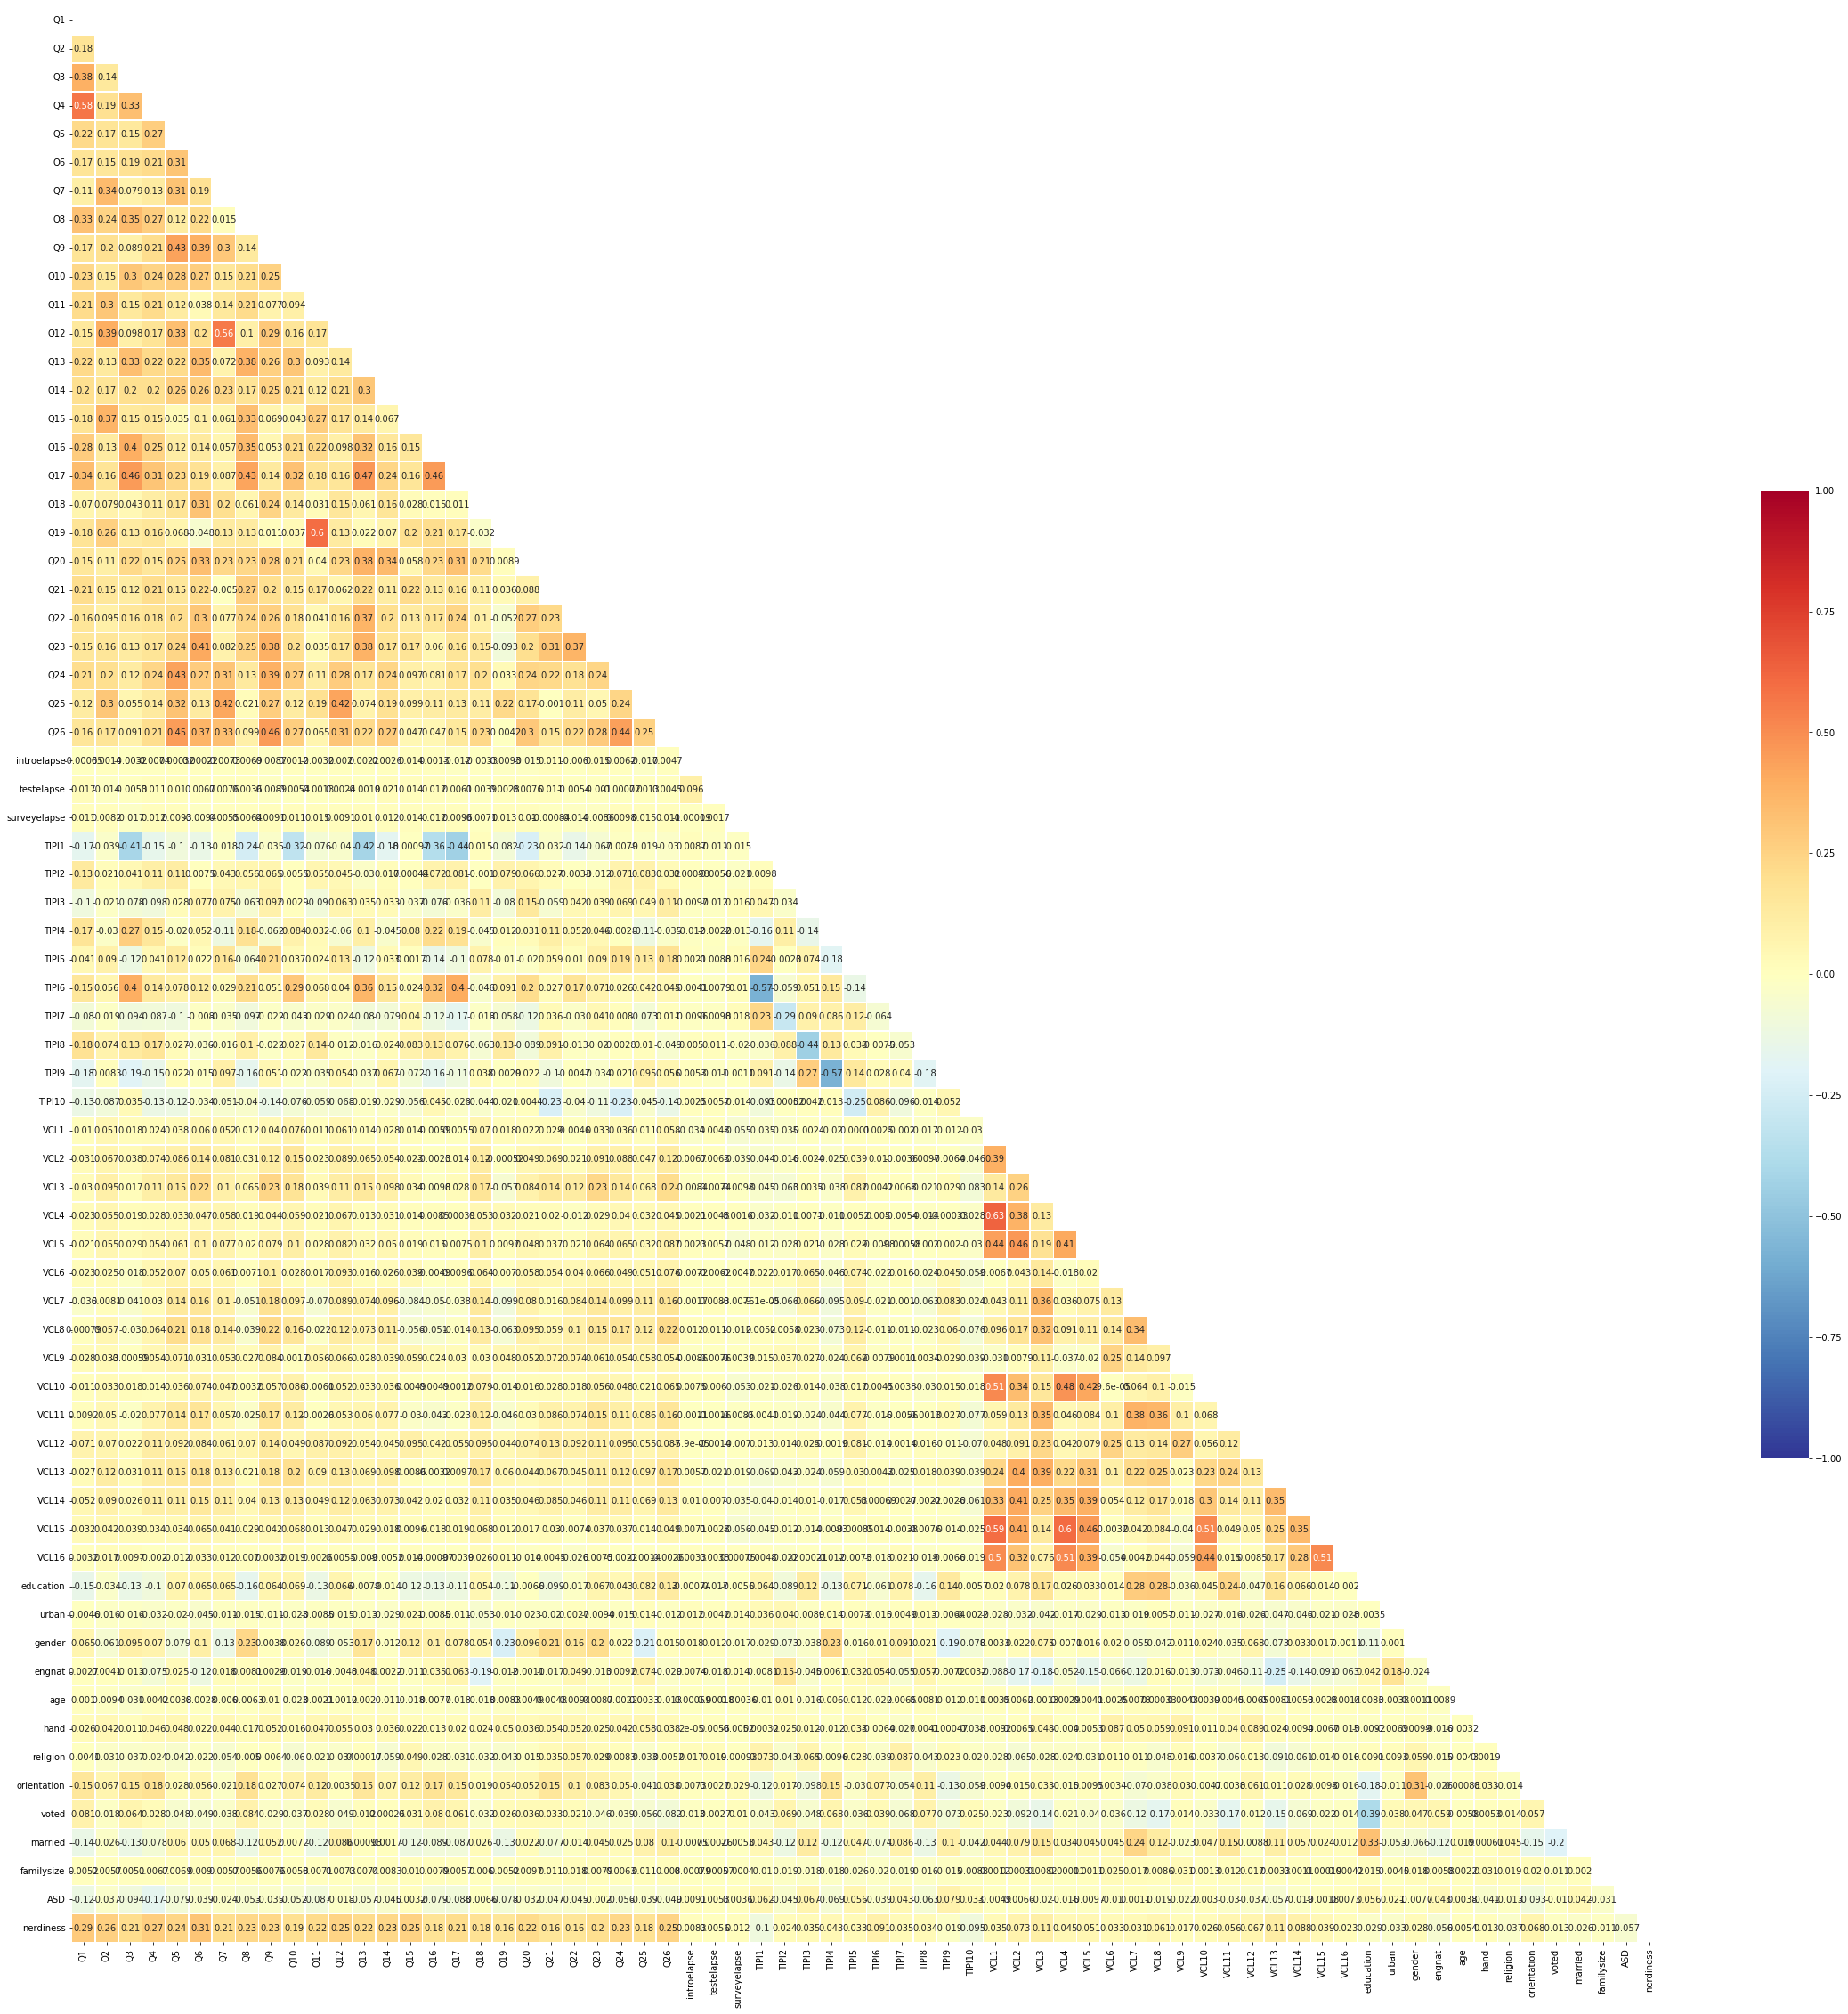

In [ ]:
import matplotlib.pyplot as plt
df = train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(40,40) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


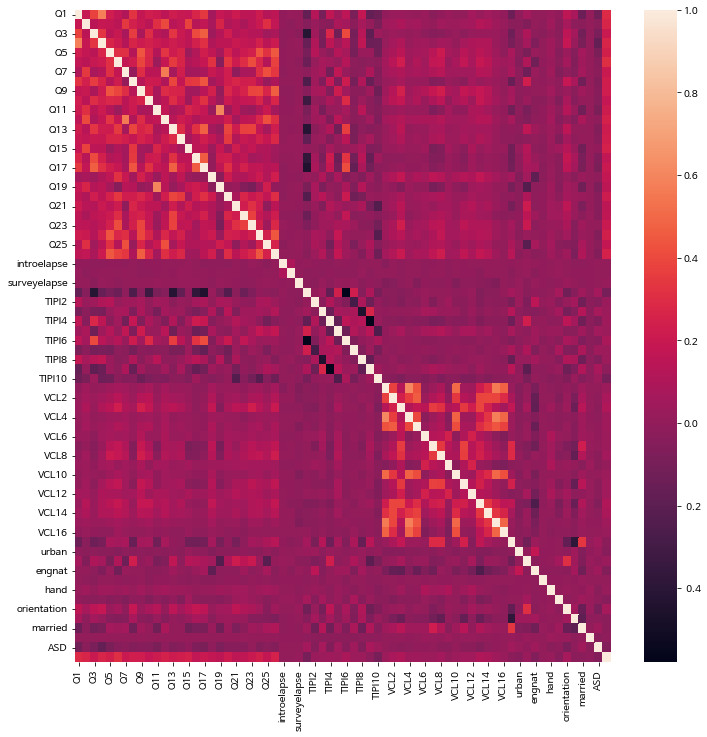

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(new_train.corr(),)
plt.show()

In [ ]:
test = pd.DataFrame(test)
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35452 entries, 0 to 35451
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            35333 non-null  float64
 1   Q2            35305 non-null  float64
 2   Q3            35322 non-null  float64
 3   Q4            35327 non-null  float64
 4   Q5            35362 non-null  float64
 5   Q6            35320 non-null  float64
 6   Q7            35310 non-null  float64
 7   Q8            35344 non-null  float64
 8   Q9            35348 non-null  float64
 9   Q10           35232 non-null  float64
 10  Q11           35333 non-null  float64
 11  Q12           35303 non-null  float64
 12  Q13           35356 non-null  float64
 13  Q14           35350 non-null  float64
 14  Q15           35345 non-null  float64
 15  Q16           35367 non-null  float64
 16  Q17           35373 non-null  float64
 17  Q18           35305 non-null  float64
 18  Q19           35355 non-nu

In [ ]:
test.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD'],
      dtype='object')

In [ ]:
new_test = test.dropna(how='any')
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30115 entries, 0 to 35449
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            30115 non-null  float64
 1   Q2            30115 non-null  float64
 2   Q3            30115 non-null  float64
 3   Q4            30115 non-null  float64
 4   Q5            30115 non-null  float64
 5   Q6            30115 non-null  float64
 6   Q7            30115 non-null  float64
 7   Q8            30115 non-null  float64
 8   Q9            30115 non-null  float64
 9   Q10           30115 non-null  float64
 10  Q11           30115 non-null  float64
 11  Q12           30115 non-null  float64
 12  Q13           30115 non-null  float64
 13  Q14           30115 non-null  float64
 14  Q15           30115 non-null  float64
 15  Q16           30115 non-null  float64
 16  Q17           30115 non-null  float64
 17  Q18           30115 non-null  float64
 18  Q19           30115 non-nu

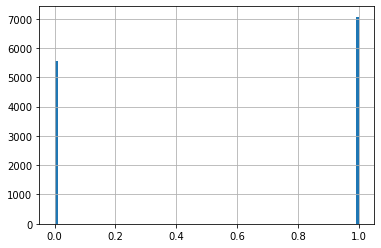

In [ ]:
new_train['nerdiness'].hist(bins=100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_train['country'] = le.fit_transform(new_train['country'])
new_test['country'] = le.fit_transform(new_test['country'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train.iloc[:,0:-1], new_train['nerdiness'] , test_size = 0.2)

In [ ]:
import tensorflow as tf
import numpy as np
np.random.seed(3)
tf.random.set_seed(3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=100 ,validation_split=0.2,batch_size=64,callbacks=early_stop)
performance = model.evaluate(X_test, y_test, verbose=2)
print('정답률:',performance[1], 'loss:', performance[0])

Epoch 1/100
127/127 [==============================] - 1s 5ms/step - loss: 136.3931 - accuracy: 0.4363 - val_loss: 304.5782 - val_accuracy: 0.4567
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 120.2725 - accuracy: 0.4373 - val_loss: 283.2700 - val_accuracy: 0.4627
Epoch 3/100
127/127 [==============================] - 0s 3ms/step - loss: 107.3777 - accuracy: 0.4525 - val_loss: 264.7276 - val_accuracy: 0.4701
Epoch 4/100
127/127 [==============================] - 0s 3ms/step - loss: 99.1368 - accuracy: 0.4865 - val_loss: 249.6447 - val_accuracy: 0.4874
Epoch 5/100
127/127 [==============================] - 0s 3ms/step - loss: 91.6143 - accuracy: 0.5093 - val_loss: 234.2822 - val_accuracy: 0.5072
Epoch 6/100
127/127 [==============================] - 0s 3ms/step - loss: 84.1833 - accuracy: 0.5242 - val_loss: 225.3120 - val_accuracy: 0.5141
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 77.8438 - accuracy: 0.5385 - val_loss: 203.621

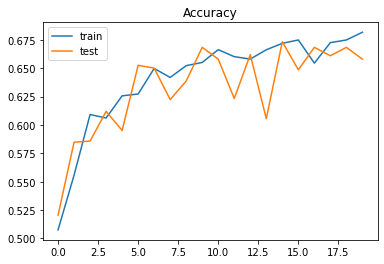

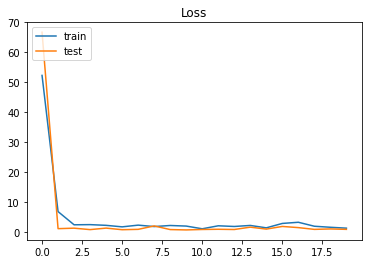

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()